Copyright IBM Corp. 2023

This will generate Figure 4 and Figure 6 in Osogami et al. (2022).


> Takayuki Osogami, Segev Wasserkrug, Elisheva S. Shamash, "Mechanism Learning for Trading Networks", arXiv:2208.09222, 2022

Set `reduce_variables = False` to generate Figure 4 and `reduce_variables = True` to generate Figure 6

In [1]:
reduce_variables = False
# reduce_variables = True

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pathlib
from collections import defaultdict

CB = True

path_name = "../exp/log/random_groves_learn"
fig_path_name = "../exp/fig/random_groves_learn"

if reduce_variables:
    path_name += "_reduced"
    fig_path_name += "_reduced"
if CB:
    path_name += "_CB"
    fig_path_name += "_CB"
    
fig_path = pathlib.Path(fig_path_name)
fig_path.mkdir(exist_ok=True, parents=True)

In [3]:
path = pathlib.Path(path_name)
result = defaultdict(dict)
for f in path.iterdir():
    if not f.name.endswith(".csv"):
        continue
    if any([
        int(f.name.strip(".csv").split("_")[0]) != 10000,
        int(f.name.strip(".csv").split("_")[2]) != 1
    ]):
        continue
    df = pd.read_csv(f)
    n_sample = int(f.name.strip(".csv").split("_")[1])
    result[n_sample] = dict()
    for player in ["S-L", "S-H", "B-L", "B-H", "IP"]:
        col = "learn_utility_" + player
        result[n_sample][player] = df[col]

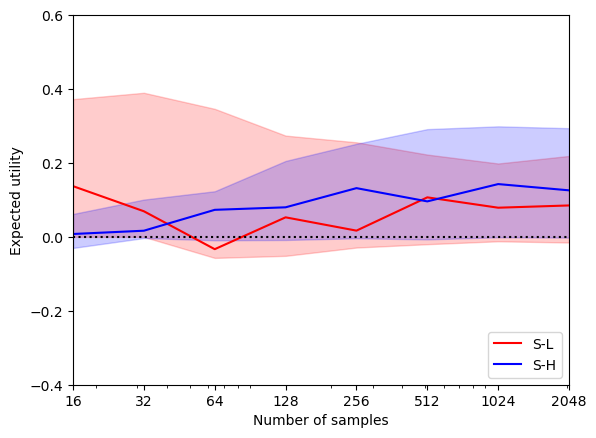

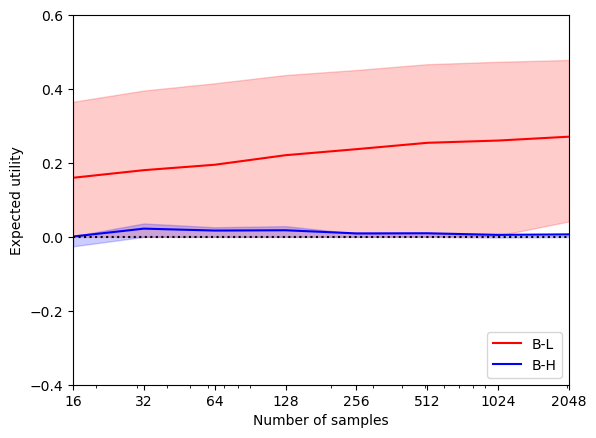

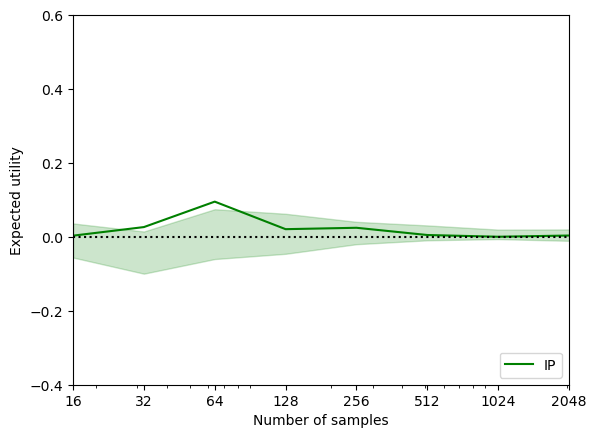

In [4]:
x = [2**n for n in range(4, 13)]
color = {
    "S-L": "r",
    "S-H": "b",
    "B-L": "r",
    "B-H": "b",
    "IP": "g"
}
low_confidence = 0.159
#low_confidence = 0.1
high_confidence = 0.023

target_list = ["IR-S", "IR-B", "WBB"]
player_list = {
    "IR-S": ["S-L", "S-H"],
    "IR-B": ["B-L", "B-H"],
    "WBB": ["IP"]
}

for target in target_list:
    plt.figure()
    for player in player_list[target]:
        plt.semilogx(x, [result[n_sample][player].mean() for n_sample in x], label=player, color=color[player])
        plt.fill_between(x,
                         [result[n_sample][player].quantile(1 - low_confidence) for n_sample in x],
                         [result[n_sample][player].quantile(low_confidence) for n_sample in x],
                         color=color[player], alpha=.2)
    plt.plot(x, [0 for _ in x], color="k", linestyle=":")
    plt.xticks(x, x)
    plt.xlim([min(x), max(x)])
    plt.ylim([-0.4, 0.6])
    plt.legend(loc=4)
    plt.xlabel("Number of samples")
    plt.ylabel("Expected utility")
    filename = "n_sample_" + target
    filename += ".pdf"
    plt.savefig(fig_path.joinpath(filename), bbox_inches='tight')

In [5]:
path = pathlib.Path(path_name)
n_feasible = defaultdict(dict)
for f in path.iterdir():
    if not f.name.endswith(".csv"):
        continue
    if any([
        int(f.name.strip(".csv").split("_")[0]) != 10000,
        int(f.name.strip(".csv").split("_")[2]) != 1
    ]):
        continue
    df = pd.read_csv(f)
    n_sample = int(f.name.strip(".csv").split("_")[1])
    n_feasible[n_sample] = df["learn_is_feasible"].sum()

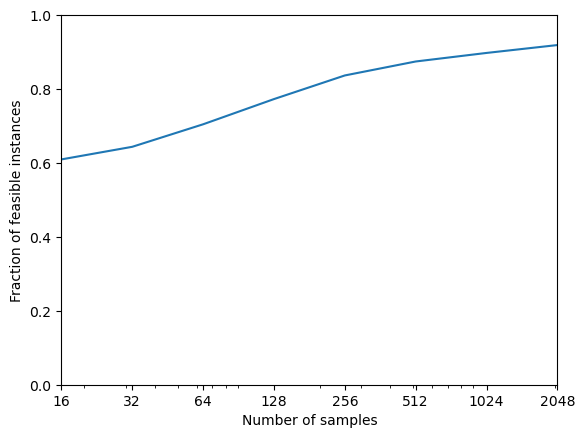

In [6]:
plt.figure()
plt.semilogx(x, [n_feasible[n_sample]/len(df) for n_sample in x])
plt.xticks(x, x)
plt.xlim([min(x), max(x)])
plt.ylim([0, 1])
#plt.legend(loc=4)
plt.xlabel("Number of samples")
plt.ylabel("Fraction of feasible instances")
filename = "feasible"
filename += ".pdf"
plt.savefig(fig_path.joinpath(filename), bbox_inches='tight')